# Investment Analysis Assigment

### Importing Libraries

In [139]:
import pandas as pd
import numpy as np

In [140]:
# hide the warnings
import warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1

### Read CSV Files

In [141]:
#read the csv files
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")
companies = pd.read_csv('companies.txt', sep='\t', encoding = "ISO-8859-1")

In [142]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [143]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


## Q. How many unique companies are present in rounds2?

#### As we see in the rounds2  and companies dataframe, the case of company permalink and permalink is different. So, first we need  to convert the company name into the same case. Let's do it in lower case

__lower()__ function is used to convert the string into lower case.

__nunique()__ function is used to calculate the count of unique values in the column.

In [144]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2['company_permalink'].nunique()

66370

## Q. How many unique companies are present in companies?

In [145]:
companies['permalink'] = companies['permalink'].str.lower()
companies['permalink'].nunique()

66368

## Q. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In the companies data frame, we can use '__permalink column__' as the unique key for each column

## Q. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

Lets find out with the code about the missing companies

#### Missing companies in companies dataframe and present in rounds2 dataframe

__isin()__ method is used to filter data frames.

In [146]:
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


### Yes, there are the companies which are present in rounds2 and not present in companies

## Q. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [147]:
# merge the both dataframes with merge function
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how='left')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


__shape__ attribute of __pandas.DataFrame__ stores the __number__ of __rows__ and __columns__ as a __tuple__ (number of rows, number of columns)

In [148]:
master_frame.shape

(114949, 16)

### ANS. 114949 Observations are present in master_frame

## Data Cleaning 

1. Finding Null Values
2. Dropping unnecessary columns
3. Dropping unnecessary rows

First we need to clean the data before do some operations on dataframe.

Let's do the most interesting and important part of the Machine Learning.

In [149]:
#check if any null values present in each column in dataframe
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                   True
name                        True
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [150]:
#check the number of null values present in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [151]:
#calulcate the percentage of null values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In the dataframe, there is so many columns which are not useful for analysis. So we can drop those columns for better understanding.

In [152]:
#Drop the unnecessary columns
master_frame =  master_frame.drop(['funding_round_code','funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.01
category_list          2.97
country_code           7.55
dtype: float64

Now, we still have about __17% missing values__ in the column __raised_amount_usd__.And this column is __useful__ for our __analysis__, if value of this column is __null__ then there is __no useful__ in our __analysis__. 
Lets __remove__ the __missing rows__ in __raised_amount_usd__.

In [153]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

Now, Drop other null values in the dataframe

In [160]:
master_frame=master_frame[~master_frame['category_list'].isnull()]

In [161]:
master_frame=master_frame[~master_frame.['country_code'].isnull()]

In [162]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

# Checkpoint 2: Funding Type Analysis

## Q. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) ?

In [163]:
#Calulate the mean value of funding types
mf_mean = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
mean_seed = mf_mean['seed']
mean_angel = mf_mean['angel']
mean_venture = mf_mean['venture']
mean_pvt_eq = mf_mean['private_equity']

#Calulate the median value of funding types
mf_median = master_frame.groupby('funding_round_type')['raised_amount_usd'].median()
median_seed = mf_median['seed']
median_angel = mf_median['angel']
median_venture = mf_median['venture']
median_pvt_eq = mf_median['private_equity']

data = [[mean_seed , median_seed],
        [mean_angel, median_angel],
        [mean_venture, median_venture],
        [mean_pvt_eq, median_pvt_eq]]

pd.DataFrame(data,columns=['Mean', 'Median'],index=['seed','angel','venture','private_equity'])

,Mean,Median
seed,7.477937e+05,300000.0
angel,9.715739e+05,414906.0
venture,1.172422e+07,5000000.0
private_equity,7.393849e+07,20000000.0


## Q. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds? 

In [164]:
#create a dataframe for investment fund between 5 - 15 million USD
df_fund = master_frame.groupby('funding_round_type').filter(lambda x: ((x.raised_amount_usd).mean()>=5000000) & ((x.raised_amount_usd).mean()<=15000000))
df_fund

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
114931,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,MYS
114934,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA
114936,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA
114937,/organization/zytoprotec,venture,2686600.0,Zytoprotec,Biotechnology,AUT


In [165]:
df_fund['funding_round_type'].unique()

array(['venture'], dtype=object)

### ANS. Most Suitable fund type : Venture

# Checkpoint 3: Country Analysis

## Q. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)?

In [166]:
top9_countries = df_fund.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
pd.DataFrame(top9_countries)

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


## Q. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)?

In [167]:
top9 = df_fund[df_fund['country_code'].isin(top9_countries.index.values)]
top9

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,USA
114923,/organization/zyomyx-inc,venture,555016.0,ZYOMYX,Biotechnology,USA
114934,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA
114936,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA


## Q. Identify the top three English-speaking countries in the data frame top9? 

#### ANS. From list of countries whose official language is English(not consider the primary langauage), we can conclude that the top three countries with the largest investment and speak English are USA, GBR, IND. They are the most suitable countries for investment for Spark Funds.

# Checkpoint 4: Sector Analysis 1

In [168]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [169]:
# In mapping data, we observed that at many places in the category_list column the 'na' 
##is misprinted as '0'
# Eg. Alter0tive Medicine
# So, we need to handle this 
mapping['category_list'] = mapping['category_list'].replace({'^0': 'Na', '0': 'na'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


# Extract the primary sector of each category list from the category_list column



In [170]:
# we need to split the category_list with '|' to extract the primary sector of each company
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])
top9

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,Analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA,Analytics
...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,USA,Biotechnology
114923,/organization/zyomyx-inc,venture,555016.0,ZYOMYX,Biotechnology,USA,Biotechnology
114934,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA,E-Commerce
114936,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA,Biotechnology


## Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)



In [171]:
#set the category_list as a index
mapping = mapping.set_index(['category_list'])
category = np.array(mapping.index.values[1:])
#print(category)
#Create a function for mapping the primary sector to one of eight main sector
def main_category(arg):
    categories = np.array(arg.split("|"))
    categories= np.array([i for i in categories if i in category])
    func = lambda categories: mapping.loc[categories[0]].idxmax(axis=1) if (categories.size >= 1) else ''
    return func(categories) 

In [172]:
top9['main_sector'] = top9['primary_sector'].apply(main_category)
top9.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN,Curated Web,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"


In [173]:
top9.shape

(44118, 8)

# Checkpoint 5: Sector Analysis 2

## Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

#### All the columns of the master_frame along with the primary sector and the main sector

#### The total number (or count) of investments for each main sector in a separate column

#### The total amount invested in each main sector in a separate column

In [174]:
#For USA
D1 = top9[(top9.country_code == 'USA') & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]
#For GBR
D2 = top9[(top9.country_code == 'GBR') & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]
#For IND
D3 = top9[(top9.country_code == 'IND') & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]


In [175]:
#For USA

count_of_investment = D1.groupby('main_sector')['main_sector'].count()
total_investment = D1.groupby('main_sector')['raised_amount_usd'].sum()

D1['count_of_investment'] = D1.main_sector.apply(lambda x: count_of_investment[x])
D1['total_investment'] = D1.main_sector.apply(lambda x: total_investment[x])
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count_of_investment,total_investment
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging",1583,1.397157e+10
103,/organization/128-technology,venture,11999347.0,128 Technology,Service Providers|Technology,USA,Service Providers,Others,2950,2.632101e+10
110,/organization/1366-technologies,venture,15000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,799,7.258553e+09
111,/organization/1366-technologies,venture,5000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,799,7.258553e+09


In [176]:
#FOR GBR

count_of_investment = D2.groupby('main_sector')['main_sector'].count()
total_investment = D2.groupby('main_sector')['raised_amount_usd'].sum()

D2['count_of_investment'] = D2.main_sector.apply(lambda x: count_of_investment[x])
D2['total_investment'] = D2.main_sector.apply(lambda x: total_investment[x])
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count_of_investment,total_investment
401,/organization/365scores,venture,5500000.0,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",133,1.089404e+09
864,/organization/7digital,venture,8468328.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment,56,4.827847e+08
865,/organization/7digital,venture,10000000.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment,56,4.827847e+08
942,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment,56,4.827847e+08
943,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment,56,4.827847e+08


In [177]:
#For IND

count_of_investment = D3.groupby('main_sector')['main_sector'].count()
total_investment = D3.groupby('main_sector')['raised_amount_usd'].sum()

D3['count_of_investment'] = D3.main_sector.apply(lambda x: count_of_investment[x])
D3['total_investment'] = D3.main_sector.apply(lambda x: total_investment[x])
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count_of_investment,total_investment
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment,33,2.808300e+08
227,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,E-Commerce,Others,110,1.013410e+09
1049,/organization/a-little-world,venture,6410000.0,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",60,5.505496e+08
2507,/organization/adlabs-imagica,venture,8180000.0,Adlabs Imagica,Entertainment|Tourism,IND,Entertainment,Entertainment,33,2.808300e+08
3457,/organization/agile,venture,5740000.0,Agile,Finance|Finance Technology|FinTech|Insurance,IND,Finance,"Social, Finance, Analytics, Advertising",60,5.505496e+08


### For USA Country Stats

#### 1. Total number of investments (count)

In [178]:
D1['company_permalink'].size

12064

#### 2. Total amount of investment (USD)

In [179]:
D1['raised_amount_usd'].sum()

107766584223.0

####  3. Top sector (based on count of investments)

In [180]:
top_sectors = D1.groupby('main_sector')['primary_sector'].count().nlargest()
top_sectors.head(10)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: primary_sector, dtype: int64

In [181]:
top_sectors.index[0]

'Others'

#### 4. Second-best sector (based on count of investments)

In [182]:
top_sectors.index[1]

'Social, Finance, Analytics, Advertising'

#### 5. Third-best sector (based on count of investments)

In [183]:
top_sectors.index[2]

'Cleantech / Semiconductors'

#### 6. Number of investments in the top sector

In [184]:
top_sectors[0]

2950

#### 7. Number of investments in the second-best sector

In [185]:
top_sectors[1]

2714

#### 8. Number of investments in the third-best sector

In [186]:
top_sectors[2]

2350

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [187]:
D1[(D1.main_sector == top_sectors.index[0])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [188]:
D1[(D1.main_sector == top_sectors.index[1])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
Name: raised_amount_usd, dtype: float64

### For UK Country Stats

#### 1. Total number of investments (count)

In [189]:
D2['company_permalink'].size

621

#### 2. Total amount of investment (USD)

In [190]:
D2['raised_amount_usd'].sum()

5379078691.0

####  3. Top sector (based on count of investments)

In [191]:
top_sectors = D2.groupby('main_sector')['primary_sector'].count().nlargest()
top_sectors

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: primary_sector, dtype: int64

In [192]:
top_sectors.index[0]

'Others'

#### 4. Second-best sector (based on count of investments)

In [193]:
top_sectors.index[1]

'Social, Finance, Analytics, Advertising'

#### 5. Third-best sector (based on count of investments)

In [194]:
top_sectors.index[2]

'Cleantech / Semiconductors'

#### 6. Number of investments in the top sector 

In [195]:
top_sectors[0]

147

#### 7. Number of investments in the second-best sector

In [196]:
top_sectors[1]

133

#### 8. Number of investments in the third-best sector

In [197]:
top_sectors[2]

130

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [198]:
D2[(D2.main_sector == top_sectors.index[0])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [199]:
D2[(D2.main_sector == top_sectors.index[1])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

### For IND Country Stats

#### 1. Total number of investments (count)

In [200]:
D3['company_permalink'].size

328

#### 2. Total amount of investment (USD)

In [201]:
D3['raised_amount_usd'].sum()

2949543602.0

####  3. Top sector (based on count of investments)

In [202]:
top_sectors = D3.groupby('main_sector')['primary_sector'].count().nlargest()
top_sectors

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: primary_sector, dtype: int64

In [203]:
top_sectors.index[0]

'Others'

#### 4. Second-best sector (based on count of investments)

In [204]:
top_sectors.index[1]

'Social, Finance, Analytics, Advertising'

#### 5. Third-best sector (based on count of investments)

In [205]:
top_sectors.index[2]

'News, Search and Messaging'

#### 6. Number of investments in the top sector 

In [206]:
top_sectors[0]

110

#### 7. Number of investments in the second-best sector

In [207]:
top_sectors[1]

60

#### 8. Number of investments in the third-best sector

In [208]:
top_sectors[2]

52

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [209]:
D3[(D3.main_sector == top_sectors.index[0])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [210]:
D3[(D3.main_sector == top_sectors.index[1])].groupby('name')['raised_amount_usd'].sum().nlargest()

name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

## A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

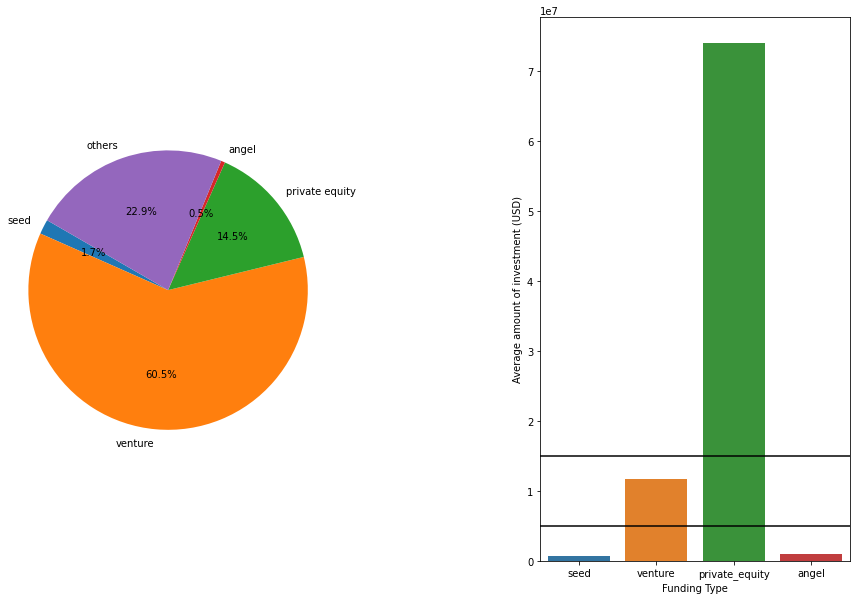

In [212]:
# calculate the total investment amount of all funding types
total_investment = master_frame['raised_amount_usd'].sum()

# calculate the fraction for seed type
total_seed = master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd'].sum()
seed_fraction = total_seed/total_investment

# calculate the fraction for venture type
total_venture = master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd'].sum()
venture_fraction = total_venture/total_investment

# calculate the fraction for private_equity type
total_pvt_eq = master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd'].sum()
pvt_eq_fraction = total_pvt_eq/total_investment

angel = master_frame[master_frame['funding_round_type'] == 'angel']['raised_amount_usd'].sum()
angel_fraction = angel/total_investment

# calculate the fraction for other funding types
other_funds = 1 - (seed_fraction + venture_fraction + pvt_eq_fraction + angel_fraction)

# set the labels for pie chart
labels = ['seed', 'venture', 'private equity', 'angel','others']
# set the fractions
sizes = [seed_fraction, venture_fraction, pvt_eq_fraction, angel_fraction,other_funds]
# using the subplot
fig1, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.7)
fig1.set_figheight(10)
fig1.set_figwidth(15)

axes[0].pie(sizes, labels=labels, 
        autopct='%1.1f%%',startangle=150)
#Equal aspect ratio to draw a complete circle
axes[0].axis('equal')

#calculate the average amount of investment of each fund type
fund_means = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
fund_means = fund_means[['seed','venture','private_equity','angel']]

ax = sns.barplot(fund_means.index,fund_means.values, ax=axes[1])

ax.set(xlabel = 'Funding Type', ylabel = 'Average amount of investment (USD)')
plt.axhline(5000000, color='black')
plt.axhline(15000000, color='black')

plt.show()

# A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

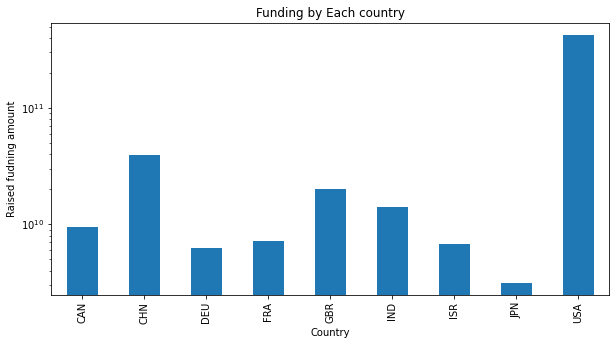

In [213]:
plt.figure(figsize=(10, 5))
top9.groupby('country_code')['raised_amount_usd'].sum().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Raised fudning amount')
plt.xlabel('Country')
plt.title('Funding by Each country')
plt.show()

# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [214]:
d1 =D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
d2 =D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
d3 =D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

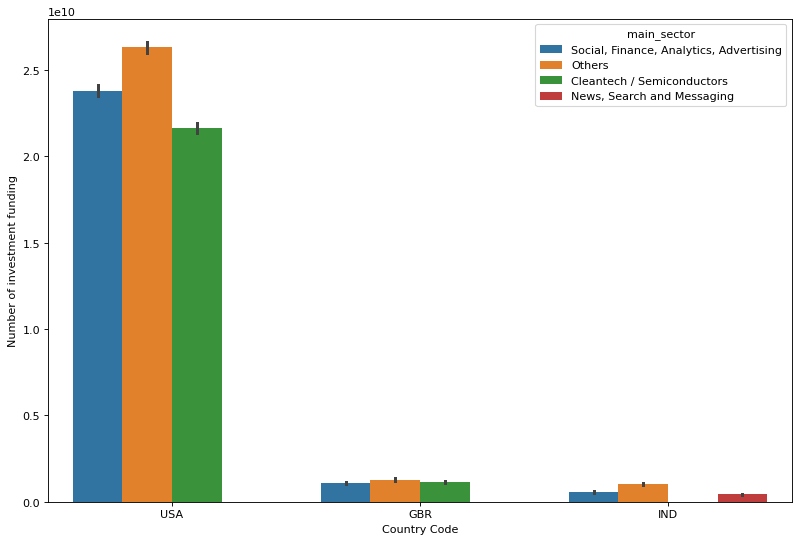

In [215]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
D = [d1,d2,d3]
ax=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=pd.concat(D),estimator=np.sum)
ax.set(xlabel = 'Country Code', ylabel = 'Number of investment funding')
plt.show()